In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('heartdisease.csv')
df.drop(columns='education',inplace=True)
df


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


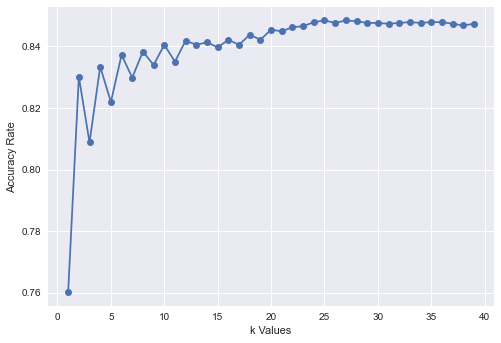

In [41]:
# --> SELECTING A 'k' VALUE
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

accuracy = []

data = df[['age','prevalentHyp','sysBP','diaBP']]
data = np.array(data)
y = df['TenYearCHD']

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    acc=cross_val_score(model,data,y,cv=10)
    accuracy.append(acc.mean())

i = np.arange(1,40,1)

plt.style.use('seaborn')    

plt.plot(i,accuracy,marker='o')
plt.xlabel('k Values')
plt.ylabel('Accuracy Rate')

plt.show()


In [42]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=25)

In [43]:
from sklearn.model_selection import KFold

kfcv = KFold(n_splits=10)

score = []

for train_index, test_index in kfcv.split(data):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = y[train_index], y[test_index]  
        model.fit(X_train,y_train)  
        acc = model.score(X_test,y_test)
        score.append(acc)

print(score)
#--> SCORES OF DIFFERENT ITERATIONS IN kFOLD 
score = np.array(score)
print(score.mean())
#--> AVERGAGE ACCURACY

[0.8142076502732241, 0.8442622950819673, 0.8497267759562842, 0.8770491803278688, 0.8387978142076503, 0.8579234972677595, 0.8493150684931506, 0.8657534246575342, 0.8493150684931506, 0.8356164383561644]
0.8481967213114754


In [44]:
from sklearn.metrics import classification_report

model.fit(X_train,y_train)

pred = model.predict(X_test)

print(classification_report(y_test,pred))
#--> RESULTS OF LAST ITERATION

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       305
           1       0.50      0.03      0.06        60

    accuracy                           0.84       365
   macro avg       0.67      0.51      0.49       365
weighted avg       0.78      0.84      0.77       365

